In [1]:
# import required libraries
import pandas as pd
import numpy as np
# import required libraries 
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [2]:
# Import seeds dataset
df_seed = pd.read_table('seeds_dataset.txt', sep="\t",on_bad_lines='skip')
# set the column names
df_seed.columns = ["area", "parimeter", "compactness", "length_of_kernal", "width_of_kernal", "asymmetry", 
                "length_of_kernel_groove", "type"]

In [3]:
df_seed.isnull().sum()

area                       0
parimeter                  0
compactness                0
length_of_kernal           0
width_of_kernal            0
asymmetry                  0
length_of_kernel_groove    0
type                       0
dtype: int64

In [4]:
df_seed.corr().T

,area,parimeter,compactness,length_of_kernal,width_of_kernal,asymmetry,length_of_kernel_groove,type
area,1.000000,0.994449,0.609904,0.951175,0.970978,-0.222804,0.863362,-0.341249
parimeter,0.994449,1.000000,0.531880,0.972955,0.945499,-0.210643,0.890382,-0.322321
compactness,0.609904,0.531880,1.000000,0.374069,0.762191,-0.330206,0.227129,-0.541270
length_of_kernal,0.951175,0.972955,0.374069,1.000000,0.862704,-0.168791,0.933248,-0.248737
width_of_kernal,0.970978,0.945499,0.762191,0.862704,1.000000,-0.253155,0.748826,-0.422823
asymmetry,-0.222804,-0.210643,-0.330206,-0.168791,-0.253155,1.000000,-0.005443,0.571351
length_of_kernel_groove,0.863362,0.890382,0.227129,0.933248,0.748826,-0.005443,1.000000,0.033120
type,-0.341249,-0.322321,-0.541270,-0.248737,-0.422823,0.571351,0.033120,1.000000


In [5]:
df_seed.describe()

,area,parimeter,compactness,length_of_kernal,width_of_kernal,asymmetry,length_of_kernel_groove,type
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,14.917020,14.594596,0.870810,5.642545,3.265298,3.706683,5.421667,2.000000
std,2.927276,1.313651,0.023379,0.444635,0.379266,1.471047,0.493759,0.812341
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.315000,13.470000,0.856900,5.267000,2.953750,2.600250,5.046000,1.000000
50%,14.405000,14.360000,0.873450,5.541000,3.243500,3.634500,5.229500,2.000000
75%,17.502500,15.827500,0.886900,6.004000,3.565250,4.812000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [6]:
# set the input variables
x = df_seed[['area', 'length_of_kernal','width_of_kernal', 'asymmetry', 'length_of_kernel_groove']]

# target value
y = df_seed['type']

# create train, test and split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.5, random_state=5)

In [7]:
# create our svm model with Regularization, maximum-margin & maximun iteration
svm = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))

# fit the training data to the model
svm.fit(X_train, Y_train)

# print the score of our model
print("SVM Model Accuracy : ",svm.score(X_test,Y_test))

#set the y_pred to our model.predict 
y_pred = svm.predict(X_test)

# create a confusion matrix and pass i y_test and y_pred
cm = pd.DataFrame(confusion_matrix(Y_test, y_pred))


SVM Model Accuracy :  0.9191919191919192


Text(0.5, 1.0, 'SVM Decision Region Boundary')

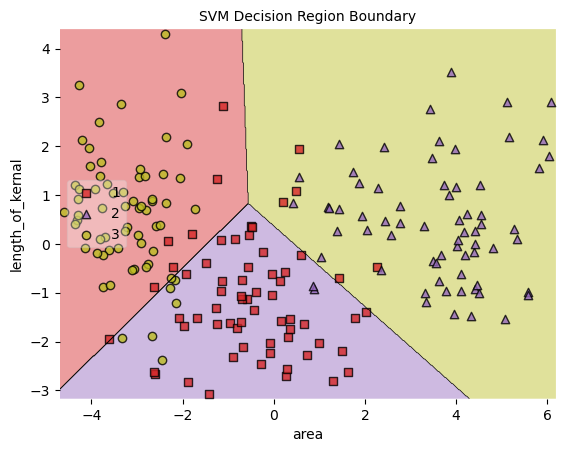

In [8]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(x)
svm.fit(X_train, y)
plot_decision_regions(X_train, y.values, clf=svm, legend=6,zoom_factor=10.0,colors='#d62728,#9467bd,#bcbd22')

plt.xlabel(x.columns[0], size=10)
plt.ylabel(x.columns[1], size=10)
plt.title('SVM Decision Region Boundary', size=10)